In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [218]:
data = pd.read_csv('./dataset/Iris.csv')

In [219]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**cek apakah ada nilai null pada dataset**

In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**menghapus Id**

In [220]:
data = data.drop('Id', axis=1)

# Classification

In [15]:
X1 = data.drop('Species', axis=1)
y1 = data['Species']

**cek apakah ada penyebaran data yang tidak seimbang**

In [16]:
y1.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**membagi dataset untuk test dan training yaitu 2/8**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=100)

# SVC

In [20]:
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)

predictions_SVM = SVM.predict(X_test)
print(classification_report(y_test, predictions_SVM))
print(accuracy_score(y_test, predictions_SVM)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

100.0


Text(58.22222222222221, 0.5, 'Actual')

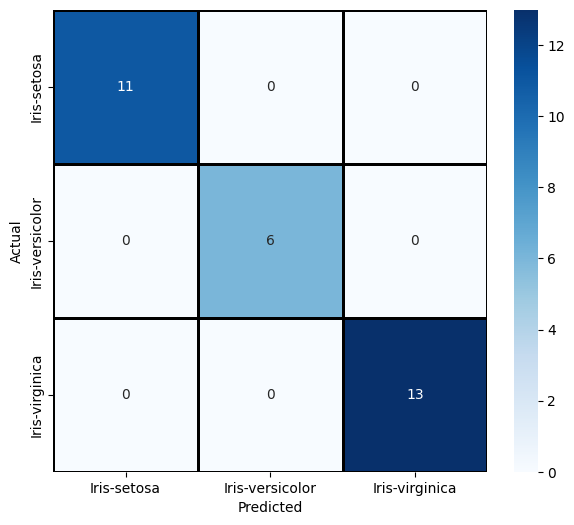

In [35]:
svc_cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize = (7,6))
sns.heatmap(svc_cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# DTC

In [38]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

predictions_DTC = DTC.predict(X_test)
print(classification_report(y_test, predictions_DTC))
print(accuracy_score(y_test, predictions_DTC)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

96.66666666666667


Text(58.22222222222221, 0.5, 'Actual')

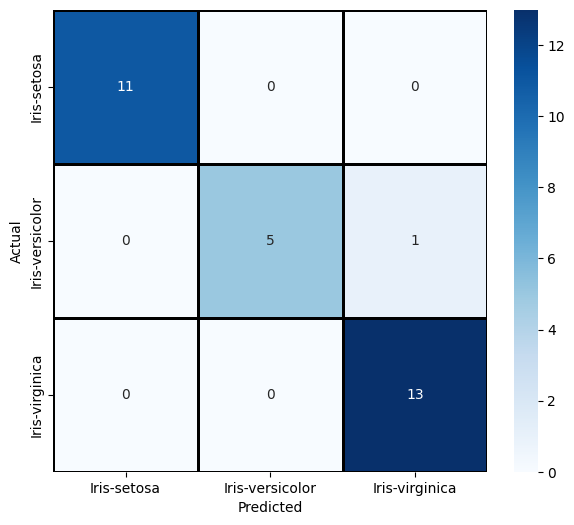

In [36]:
dtc_cm = confusion_matrix(y_test, predictions_DTC)
plt.figure(figsize = (7,6))
sns.heatmap(dtc_cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# NBC (GauissianNB)

In [33]:
NBC = GaussianNB()
NBC.fit(X_train, y_train)

predictions_NBC = NBC.predict(X_test)
print(classification_report(y_test, predictions_NBC))
print(accuracy_score(y_test, predictions_NBC)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

96.66666666666667


Text(58.22222222222221, 0.5, 'Actual')

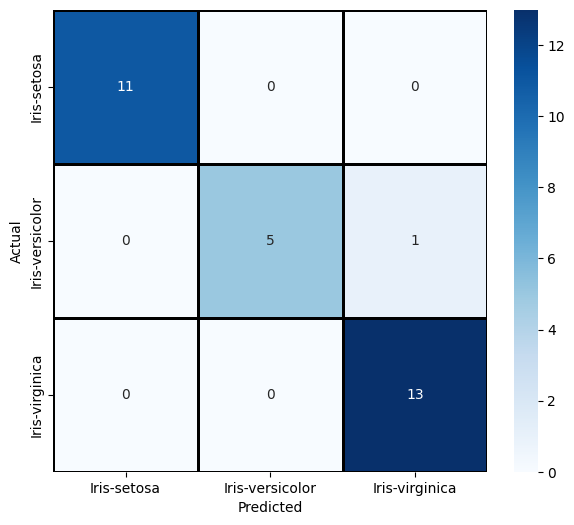

In [37]:
nbc_cm = confusion_matrix(y_test, predictions_NBC)
plt.figure(figsize = (7,6))
sns.heatmap(nbc_cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [43]:
acc1 = str(round(accuracy_score(y_test, predictions_SVM)*100,2))
acc2 = str(round(accuracy_score(y_test, predictions_DTC)*100,2))
acc3 = str(round(accuracy_score(y_test, predictions_NBC)*100,2))

In [44]:
table_array = [['SVC', acc1],
               ['DTC', acc2],
               ['NBC (GaussianNB) ', acc3]]

In [45]:
column = ['Model', 'Accuracy %']

df = pd.DataFrame(table_array, columns=column)
df

,Model,Accuracy %
0,SVC,100.0
1,DTC,96.67
2,NBC (GaussianNB),96.67


Dari Ketiga algoritma algoritma SVC adalah yang terbaik

# Clustering

In [221]:
X = data

In [222]:
d = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}
X['Species'] = data['Species'].map(d)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [223]:
def check_accuracy(y_true,y_pred):
    confusionmatrix = confusion_matrix(y_pred,y_true)
    return np.sum(np.amax(confusionmatrix/np.sum(confusionmatrix)))

In [224]:
X_original = X.drop('Species', axis=1).values
y_true = X['Species'].to_numpy()

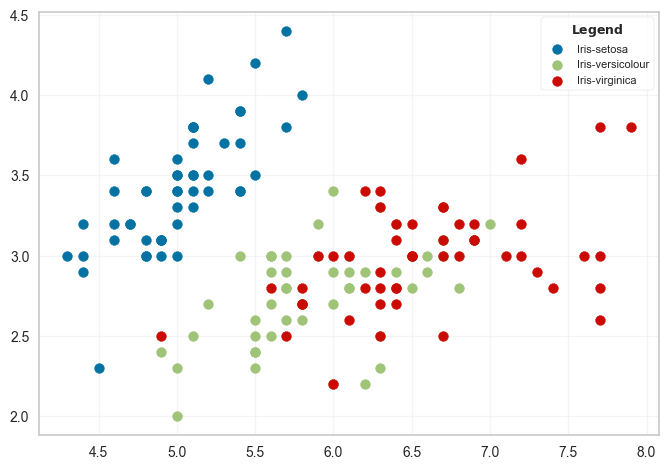

In [225]:
plt.scatter(X_original[y_true == 0, 0], X_original[y_true == 0, 1], s = 50, label = 'Iris-setosa')
plt.scatter(X_original[y_true == 1, 0], X_original[y_true == 1, 1], s = 50, label = 'Iris-versicolour')
plt.scatter(X_original[y_true == 2, 0], X_original[y_true == 2, 1], s = 50, label = 'Iris-virginica')
plt.grid(axis='both', alpha = 0.2)
plt.legend(title = '$\\bf{Legend}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)

# K-Mean

In [234]:
X1 = X.drop('Species', axis=1)

In [228]:
kmeans = KMeans(random_state = 0)
y_kmeans = kmeans.fit_predict(X1)

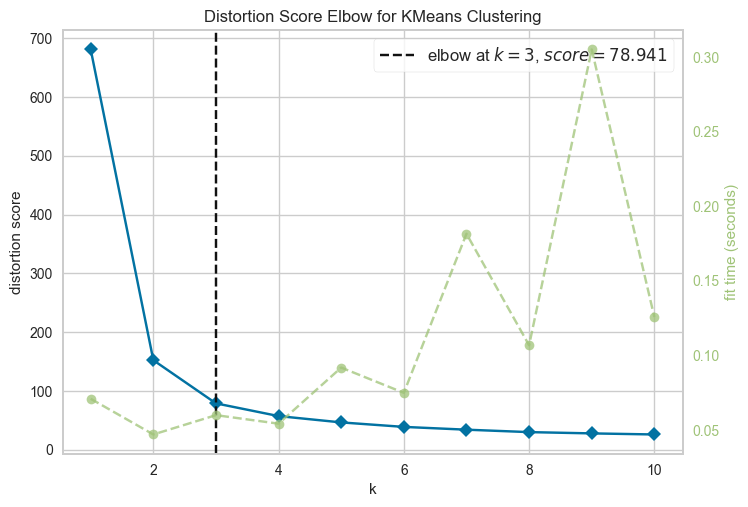

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [229]:
model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(X1)
model.show()

In [230]:
kmeans = KMeans(random_state = 0, n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [231]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [242]:
y_kmeans[y_kmeans == 0] = 3
y_kmeans[y_kmeans == 1] = 0
y_kmeans[y_kmeans == 3] = 1

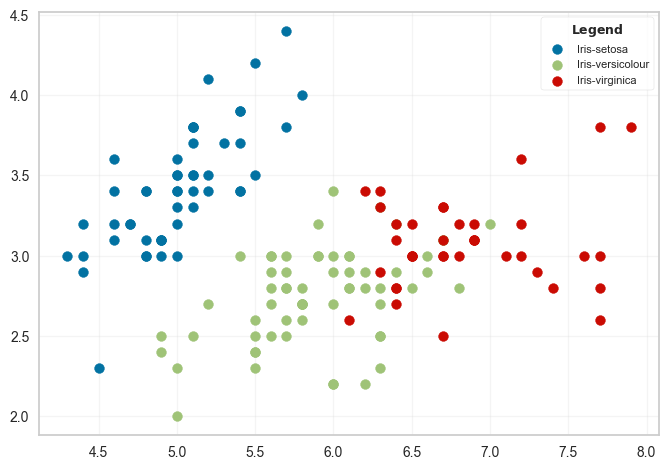

In [245]:
X1 = X1.values
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, label = 'Iris-setosa')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, label = 'Iris-versicolour')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, label = 'Iris-virginica')
plt.grid(axis='both', alpha = 0.2)
plt.legend(title = '$\\bf{Legend}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)

In [303]:
sil1 = silhouette_score(X1,y_kmeans)
print(sil1)

0.5525919445499757


In [251]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [250]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [254]:
accuracy_score(y_true, y_kmeans)*100

89.33333333333333


Text(58.22222222222221, 0.5, 'Actual')

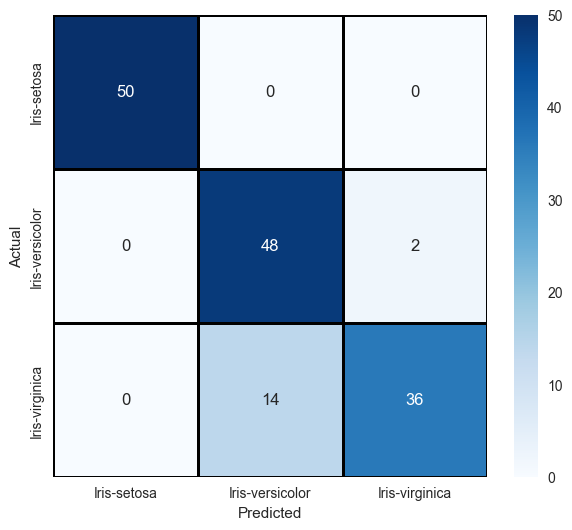

In [256]:
kmeans_cl = confusion_matrix(y_true, y_kmeans)
plt.figure(figsize = (7,6))
sns.heatmap(kmeans_cl,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# DBSCAN

In [291]:
X2 = X.drop('Species', axis=1)

In [292]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(X2)
y_dbscan = dbscan.fit_predict(X2)

In [293]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [294]:
y_dbscan[y_dbscan == -1] = 2

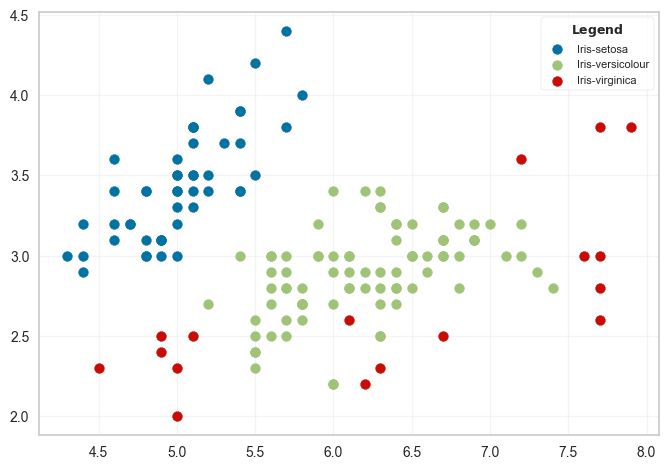

In [295]:
X2 = X2.values
plt.scatter(X2[y_dbscan == 0, 0], X2[y_dbscan == 0, 1], s = 50, label = 'Iris-setosa')
plt.scatter(X2[y_dbscan == 1, 0], X2[y_dbscan == 1, 1], s = 50, label = 'Iris-versicolour')
plt.scatter(X2[y_dbscan == 2, 0], X2[y_dbscan == 2, 1], s = 50, label = 'Iris-virginica')
plt.grid(axis='both', alpha = 0.2)
plt.legend(title = '$\\bf{Legend}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)

In [302]:
sil2 = silhouette_score(X1,y_dbscan)
print(sil2)

0.485842354600955


In [296]:
y_dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [297]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [298]:
accuracy_score(y_true, y_dbscan)*100

68.66666666666667


Text(58.22222222222221, 0.5, 'Actual')

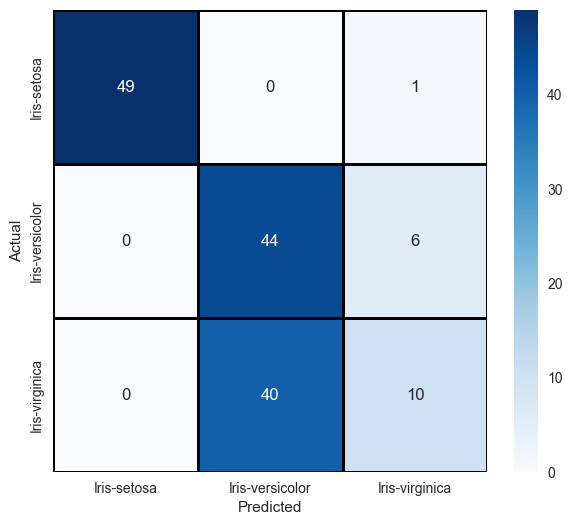

In [299]:
dbscan_cl = confusion_matrix(y_true, y_dbscan)
plt.figure(figsize = (7,6))
sns.heatmap(dbscan_cl,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
            yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [311]:
acc4 = str(round(accuracy_score(y_true, y_kmeans)*100,2))
acc5 = str(round(accuracy_score(y_true, y_dbscan)*100,2))

In [312]:
table_array = [['K-Means', acc4, sil1],
               ['DBSCAN', acc5, sil2]]

In [313]:
column = ['Model', 'Accuracy %', 'Silhouette Score']

df2 = pd.DataFrame(table_array, columns=column)
df2

,Model,Accuracy %,Silhouette Score
0,K-Means,89.33,0.552592
1,DBSCAN,68.67,0.485842


Untuk kesimpulan dari kedua model clustering K-Means jauh lebih akurat untuk hasil clustering dengan 3 cluster, untuk hasil clustering K-Means sangat bagus mencapai 89% untuk hasil akurasi dengan species yang sebenarnya. Silhoutte Score pada K-Means juga lebih tinggi, untuk detail lebihnya bisa dilihat hasil scatter plot antara species yang sebenarnya dengan kedua hasil clustering dari algoritma yang sudah diterapakan diatas